In [ ]:
!pip install gensim --upgrade gensim --user --no-warn-script-location

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=71aa0187c884541ec3b3aa04ead50992ac6d7fa96fe8c78d1df495556b691b15
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=bd707886893dced356f12f80733dac0b938854fa0665da0452689e6c6fca3d99
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0/ddd93af16d5855dd9bad417623e70948fdac119d1d34fb17c8
Successfully built fst-pso miniful


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
topik = pd.read_csv('/content/ulasanrecommended.csv', sep=';')

In [ ]:
topik.head(10)

Review_Text       Review
0  felt compel write review think game deserve on...  Recommended
1  sattisfied experience short awesomely great be...  Recommended
2  although may one graphically appeal survival h...  Recommended
3  dreadout indonesian survivalhorror game take i...  Recommended
4  scary atmosphere clever game sequence sidemiss...  Recommended
5                                        boob physic  Recommended
6  anyone play enjoyed oldschool survival horror ...  Recommended
7  first get admit appreciate devs try especially...  Recommended
8  game feel like strip fatal frame whole bunch i...  Recommended
9  thanks digital happiness good old horror game ...  Recommended

In [ ]:
text = topik['Review_Text']
text_list = []
for i in range(len(text)) :
  bbb = text[i].replace('[', '')
  bbb = bbb.replace(']','')
  bbb = bbb.replace("'", "")
  bbb = bbb.replace(",","")
  temp = []
  for j in bbb.split() :
    temp.append(j)
  text_list.append(temp)

  print(len(text_list))

Streaming output truncated to the last 5000 lines.
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783

In [ ]:
topik.head

<bound method NDFrame.head of                                              Review_Text       Review
0      felt compel write review think game deserve on...  Recommended
1      sattisfied experience short awesomely great be...  Recommended
2      although may one graphically appeal survival h...  Recommended
3      dreadout indonesian survivalhorror game take i...  Recommended
4      scary atmosphere clever game sequence sidemiss...  Recommended
...                                                  ...          ...
10588                                          good game  Recommended
10589  quite nice game u try try ty defeat level prom...  Recommended
10590  love especially sounds stage like goat thing c...  Recommended
10591  time game ease say game well worth money way g...  Recommended
10592  pretty fun game little rough around edge see g...  Recommended

[10593 rows x 2 columns]>

In [ ]:
print(text_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents
#no_above (float, optional) – Keep tokens which are contained in no more than no_above doc
print(dictionary)

Dictionary(4326 unique tokens: ['act', 'actual', 'apart', 'awkward', 'bos']...)


In [ ]:
#build corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

In [ ]:
print(len(doc_term_matrix))
print(doc_term_matrix[100])

10593
[(19, 1), (30, 1), (79, 1), (97, 2), (123, 1), (144, 1), (199, 1), (266, 1), (267, 1), (271, 1), (294, 1), (298, 1), (318, 1), (324, 1), (331, 1), (400, 1), (492, 1), (522, 1), (528, 1), (557, 1), (595, 1), (609, 1), (626, 1), (671, 1), (972, 1), (1587, 1), (1714, 1), (1715, 1), (1716, 1), (1717, 1), (1718, 1), (1719, 1), (1720, 1)]


In [ ]:
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary,coherence="c_v")
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,texts=text_list, start=start, limit=limit, step=step)

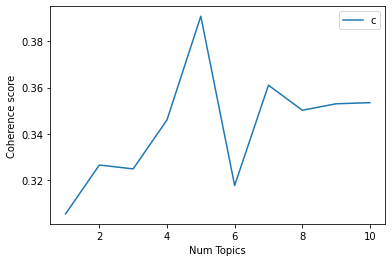

In [ ]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 5))

Num Topics = 1  has Coherence Value of 0.30541
Num Topics = 2  has Coherence Value of 0.32655
Num Topics = 3  has Coherence Value of 0.32487
Num Topics = 4  has Coherence Value of 0.34607
Num Topics = 5  has Coherence Value of 0.39088
Num Topics = 6  has Coherence Value of 0.3177
Num Topics = 7  has Coherence Value of 0.36106
Num Topics = 8  has Coherence Value of 0.35024
Num Topics = 9  has Coherence Value of 0.35302
Num Topics = 10  has Coherence Value of 0.35351


In [ ]:
from pprint import pprint
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, random_state=0, num_topics=5)
pprint(model.print_topics())

[(0,
  '0.021*"wife" + 0.014*"cry" + 0.012*"stardew" + 0.011*"animal" + '
  '0.011*"valley" + 0.011*"amaze" + 0.010*"relaxing" + 0.010*"cozy" + '
  '0.008*"beautiful" + 0.008*"meow"'),
 (1,
  '0.018*"beautiful" + 0.013*"awesome" + 0.009*"art" + 0.009*"puzzle" + '
  '0.007*"addict" + 0.006*"short" + 0.005*"music" + 0.005*"sweet" + '
  '0.005*"grind" + 0.005*"beautifully"'),
 (2,
  '0.031*"nice" + 0.028*"fun" + 0.028*"cute" + 0.011*"cat" + 0.010*"really" + '
  '0.010*"short" + 0.009*"chill" + 0.008*"relax" + 0.006*"lovely" + '
  '0.006*"cool"'),
 (3,
  '0.007*"best" + 0.007*"ending" + 0.006*"succubus" + 0.005*"much" + '
  '0.005*"get" + 0.005*"ever" + 0.004*"lot" + 0.004*"lovely" + 0.004*"visual" '
  '+ 0.004*"one"'),
 (4,
  '0.009*"farm" + 0.006*"great" + 0.005*"fun" + 0.005*"get" + 0.005*"early" + '
  '0.005*"stardew" + 0.005*"quest" + 0.004*"access" + 0.004*"lot" + '
  '0.004*"really"')]


In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, random_state=0, num_topics=5)
for idx, topic in model.print_topics(-1):
  print('Topic: {} Word: {}'.format(idx, topic))

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic: 0 Word: 0.021*"wife" + 0.014*"cry" + 0.012*"stardew" + 0.011*"animal" + 0.011*"valley" + 0.011*"amaze" + 0.010*"relaxing" + 0.010*"cozy" + 0.008*"beautiful" + 0.008*"meow"
Topic: 1 Word: 0.018*"beautiful" + 0.013*"awesome" + 0.009*"art" + 0.009*"puzzle" + 0.007*"addict" + 0.006*"short" + 0.005*"music" + 0.005*"sweet" + 0.005*"grind" + 0.005*"beautifully"
Topic: 2 Word: 0.031*"nice" + 0.028*"fun" + 0.028*"cute" + 0.011*"cat" + 0.010*"really" + 0.010*"short" + 0.009*"chill" + 0.008*"relax" + 0.006*"lovely" + 0.006*"cool"
Topic: 3 Word: 0.007*"best" + 0.007*"ending" + 0.006*"succubus" + 0.005*"much" + 0.005*"get" + 0.005*"ever" + 0.004*"lot" + 0.004*"lovely" + 0.004*"visual" + 0.004*"one"
Topic: 4 Word: 0.009*"farm" + 0.006*"great" + 0.005*"fun" + 0.005*"get" + 0.005*"early" + 0.005*"stardew" + 0.005*"quest" + 0.004*"access" + 0.004*"lot" + 0.004*"really"


In [ ]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=9533e567b68e2f4b0d747a7313aa727a81591b8fbf10f9d150e162103e18872b
  Stored in directory: /root/.cache/pip/wheels/31/8c/a0/24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis


In [ ]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'LDA-gensim.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.041454 -0.045228       1        1  54.959330
3      0.061689 -0.056686       2        1  14.950271
2      0.034070  0.113535       3        1  12.733771
1     -0.017752  0.001134       4        1   9.096605
0     -0.119461 -0.012755       5        1   8.260023, topic_info=           Term        Freq       Total Category  logprob  loglift
506        nice  217.000000  217.000000  Default  30.0000  30.0000
961        cute  246.000000  246.000000  Default  29.0000  29.0000
30          fun  307.000000  307.000000  Default  28.0000  28.0000
4000    stardew  149.000000  149.000000  Default  27.0000  27.0000
1431  beautiful  192.000000  192.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
961        cute   18.012162  246.571946   Topic5  -5.2104  -0.1229
75        would   14.080004  114.537881   T

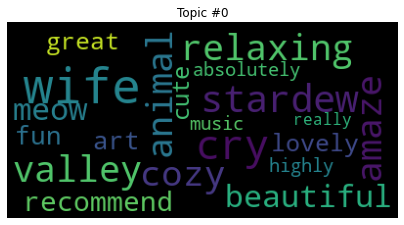

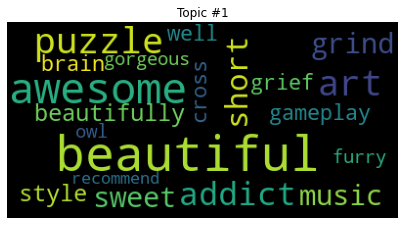

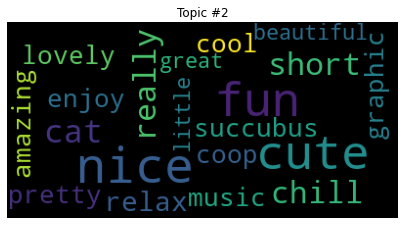

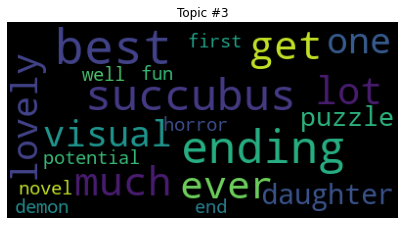

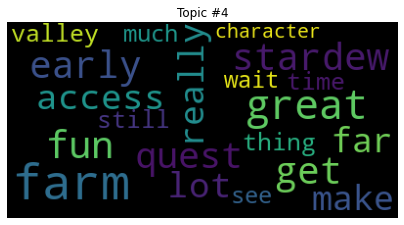

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd
for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, min_font_size=6).fit_words(dict(model.show_topic(t, 20))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("wcld-topic-#"+str(t)+".png", facecolor='k', bbox_inches='tight')
plt.show()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


In [ ]:
topik2 = pd.read_csv('/content/ulasannotrecommended.csv', sep=';')

In [ ]:
topik2.head

<bound method NDFrame.head of                                             Review_Text           Review
0     dreadout fun albeit mediocre videogame develop...  Not Recommended
1     really tried enjoy game really unfortunately w...  Not Recommended
2     get stuck corner enemy hit get limbo need wast...  Not Recommended
3     term graphic production value actually think d...  Not Recommended
4     let preface say review gear people familiar fa...  Not Recommended
...                                                 ...              ...
1637  pretty fun cute lack thing first appreciate an...  Not Recommended
1638  cup tea look good run well design make feel li...  Not Recommended
1639  game cool still shortcomings think mouse movem...  Not Recommended
1640  would die find hell another culture youtube vi...  Not Recommended
1641                          really fun game work good  Not Recommended

[1642 rows x 2 columns]>

In [ ]:
text = topik2['Review_Text']
text_list = []
for i in range(len(text)) :
  bbb = text[i].replace('[', '')
  bbb = bbb.replace(']','')
  bbb = bbb.replace("'", "")
  bbb = bbb.replace(",","")
  temp = []
  for j in bbb.split() :
    temp.append(j)
  text_list.append(temp)

  print(len(text_list))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
print(text_list)

[['dreadout', 'fun', 'albeit', 'mediocre', 'videogame', 'develop', 'indonesian', 'company', 'game', 'use', 'similar', 'mechanic', 'fatal', 'frame', 'game', 'release', 'exclusively', 'console', 'decade', 'ago', 'pro', 'great', 'concept', 'game', 'play', 'thirdperson', 'perspective', 'change', 'firstperson', 'view', 'must', 'smartphone', 'digital', 'camera', 'want', 'hurt', 'eliminate', 'enemy', 'ghost', 'possess', 'being', 'interest', 'story', 'character', 'student', 'probably', 'schooltrip', 'find', 'abandoned', 'town', 'sudden', 'start', 'investigate', 'soon', 'nightfall', 'arrives', 'spectre', 'appear', 'appropriate', 'longevity', 'seem', 'typical', 'indie', 'game', 'yet', 'hour', 'long', 'story', 'offer', 'good', 'length', 'extra', 'walkthroughs', 'do', 'missedout', 'cheevos', 'ugly', 'graphic', 'unity', 'game', 'release', 'texture', 'look', 'pretty', 'ugly', 'monster', 'related', 'effect', 'quite', 'decent', 'story', 'finish', 'know', 'expansion', 'sort', 'sequel', 'still', 'story'

In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents
#no_above (float, optional) – Keep tokens which are contained in no more than no_above doc
print(dictionary)

Dictionary(2406 unique tokens: ['abandon', 'ago', 'albeit', 'almost', 'annoying']...)


In [ ]:
#build corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

In [ ]:
print(len(doc_term_matrix))
print(doc_term_matrix[100])

1642
[(114, 1), (168, 1), (187, 1), (205, 1), (333, 1), (489, 1), (673, 1), (871, 1), (1481, 1), (1482, 1)]


In [ ]:
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary,coherence="c_v")
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,texts=text_list, start=start, limit=limit, step=step)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

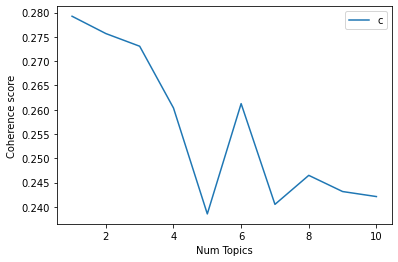

In [ ]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 5))

Num Topics = 1  has Coherence Value of 0.27925
Num Topics = 2  has Coherence Value of 0.27568
Num Topics = 3  has Coherence Value of 0.27307
Num Topics = 4  has Coherence Value of 0.26035
Num Topics = 5  has Coherence Value of 0.23853
Num Topics = 6  has Coherence Value of 0.26125
Num Topics = 7  has Coherence Value of 0.2405
Num Topics = 8  has Coherence Value of 0.24648
Num Topics = 9  has Coherence Value of 0.24314
Num Topics = 10  has Coherence Value of 0.24211


In [ ]:
from pprint import pprint
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, random_state=0, num_topics=2)
pprint(model.print_topics())

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.003*"try" + 0.003*"work" + 0.003*"first" + 0.003*"recommend" + '
  '0.003*"bug" + 0.002*"find" + 0.002*"need" + 0.002*"lot" + 0.002*"hard" + '
  '0.002*"well"'),
 (1,
  '0.003*"bug" + 0.003*"fun" + 0.003*"gameplay" + 0.003*"look" + 0.003*"want" '
  '+ 0.002*"thing" + 0.002*"combat" + 0.002*"ghost" + 0.002*"buy" + '
  '0.002*"hour"')]


In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, random_state=0, num_topics=2)
for idx, topic in model.print_topics(-1):
  print('Topic: {} Word: {}'.format(idx, topic))

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic: 0 Word: 0.003*"try" + 0.003*"work" + 0.003*"first" + 0.003*"recommend" + 0.003*"bug" + 0.002*"find" + 0.002*"need" + 0.002*"lot" + 0.002*"hard" + 0.002*"well"
Topic: 1 Word: 0.003*"bug" + 0.003*"fun" + 0.003*"gameplay" + 0.003*"look" + 0.003*"want" + 0.002*"thing" + 0.002*"combat" + 0.002*"ghost" + 0.002*"buy" + 0.002*"hour"


In [ ]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'LDA-gensim2.html')

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.005789  0.0       1        1  57.032528
0     -0.005789  0.0       2        1  42.967472, topic_info=          Term       Freq      Total Category  logprob  loglift
216       hard  13.000000  13.000000  Default  30.0000  30.0000
280        try  17.000000  17.000000  Default  29.0000  29.0000
79       point  13.000000  13.000000  Default  28.0000  28.0000
148       dont  10.000000  10.000000  Default  27.0000  27.0000
1929  survivor   5.000000   5.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
42         fun   7.713446  22.642337   Topic2  -6.1445  -0.2321
114       want   7.225439  19.416788   Topic2  -6.2099  -0.1438
171       also   6.795172  15.124351   Topic2  -6.2713   0.0446
64        look   7.165239  19.577887   Topic2  -6.2182  -0.1604
99       still   6.757032  16.063975   Topic2  -6.2769  -

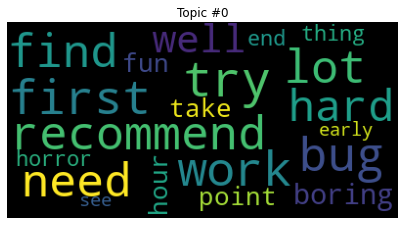

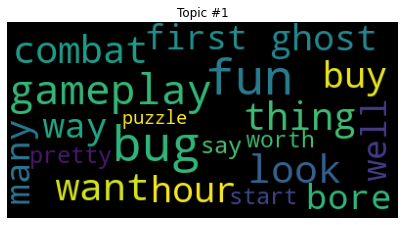

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd
for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, min_font_size=6).fit_words(dict(model.show_topic(t, 20))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("wcld-topic-#"+str(t)+".png", facecolor='k', bbox_inches='tight')
plt.show()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \
